In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
import collections
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
import argparse
import imutils
import cv2
import os
from sklearn.neural_network import MLPClassifier
import glob
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


In [3]:
from preprocess import *

# INTRODUCTION AND EDA

In [4]:
df_a = pd.read_csv('set_a.csv')

In [5]:
df_b = pd.read_csv('set_b.csv')

In [6]:
df_a_timing = pd.read_csv('set_a_timing.csv')

In [7]:
from scipy.io import wavfile as wav

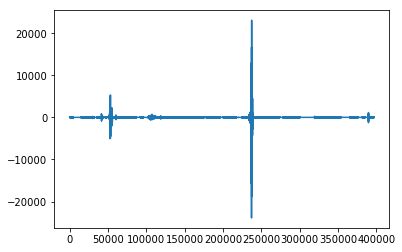

In [8]:
TRAIN_DIR = "../Final Capstone/set_a"
list_of_wavs = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
#for item in list_of_wavs: 
rate, image = wav.read('artifact__201012172012.wav')
%matplotlib inline
plt.plot(image)
plt.show()

In [9]:
df_a_timing.head()

,fname,cycle,sound,location
0,set_a/normal__201102081321.wav,1,S1,10021
1,set_a/normal__201102081321.wav,1,S2,20759
2,set_a/normal__201102081321.wav,2,S1,35075
3,set_a/normal__201102081321.wav,2,S2,47244
4,set_a/normal__201102081321.wav,3,S1,62992


# LOGISTIC REGRESSION AND SUPPORT VECTOR CLASSIFIER

In [19]:
X_train2 = X_train.reshape(74,220)

In [20]:
X_test2 = X_test.reshape(50,220)

In [21]:
lg = LogisticRegression()
lg.fit(X_train2,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred_lg = lg.predict(X_test2)

In [31]:
confusion_matrix(y_test, y_pred_lg)

array([[14,  1,  1,  3],
       [ 0,  4,  2,  2],
       [ 0,  2,  8,  3],
       [ 0,  2,  2,  6]])

In [32]:
lg.score(X_test2,y_test)


0.64000000000000001

In [33]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train2,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
svc.score(X_test2,y_test)

0.22

# KERAS MODELS

In [35]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D
from keras.utils import to_categorical





# Second dimension of the feature is dim2
feature_dim_2 = 11

# Save data to array file first
save_data_to_array(max_len=feature_dim_2)

# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 100
batch_size = 100
verbose = 1
num_classes = 4

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Saving vectors of label - 'normal': 100%|██████| 31/31 [00:13<00:00,  2.34it/s]


In [36]:
#make dense only model
# Build the Neural Network
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=220))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
X_train3 = X_train.reshape(74,220)
X_test3 = X_test.reshape(50,220)
# Train and test
model.fit(X_train3, y_train_hot, epochs=100, batch_size=64)
score, acc = model.evaluate(X_test3, y_test_hot, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/100
74/74 [==============================] - ETA: 0s - loss: 11.8337 - acc: 0.26 - 1s 13ms/step - loss: 11.5415 - acc: 0.2838
Epoch 2/100
74/74 [==============================] - ETA: 0s - loss: 11.1454 - acc: 0.29 - 0s 325us/step - loss: 11.2768 - acc: 0.2838
Epoch 3/100
74/74 [==============================] - ETA: 0s - loss: 10.3789 - acc: 0.34 - 0s 365us/step - loss: 10.2832 - acc: 0.3514
Epoch 4/100
74/74 [==============================] - ETA: 0s - loss: 10.1658 - acc: 0.35 - 0s 318us/step - loss: 10.5519 - acc: 0.3243
Epoch 5/100
74/74 [==============================] - ETA: 0s - loss: 11.0812 - acc: 0.31 - 0s 527us/step - loss: 11.3262 - acc: 0.2973
Epoch 6/100
74/74 [==============================] - ETA: 0s - loss: 11.8367 - acc: 0.26 - 0s 507us/step - loss: 11.5440 - acc: 0.2838
Epoch 7/100
74/74 [==============================] - ETA: 0s - loss: 11.8367 - acc: 0.26 - 0s 487us/step - loss: 11.5440 - acc: 0.2838
Epoch 8/100
74/74 [==============================] - ETA

74/74 [==============================] - ETA: 0s - loss: 9.3265 - acc: 0.421 - 0s 358us/step - loss: 9.3730 - acc: 0.4189
Epoch 62/100
74/74 [==============================] - ETA: 0s - loss: 9.5701 - acc: 0.406 - 0s 318us/step - loss: 9.3659 - acc: 0.4189
Epoch 63/100
74/74 [==============================] - ETA: 0s - loss: 8.3109 - acc: 0.484 - 0s 399us/step - loss: 8.4947 - acc: 0.4730
Epoch 64/100
74/74 [==============================] - ETA: 0s - loss: 8.5627 - acc: 0.468 - 0s 548us/step - loss: 9.1481 - acc: 0.4324
Epoch 65/100
74/74 [==============================] - ETA: 0s - loss: 9.0664 - acc: 0.437 - 0s 453us/step - loss: 8.9303 - acc: 0.4459
Epoch 66/100
74/74 [==============================] - ETA: 0s - loss: 9.0664 - acc: 0.437 - 0s 575us/step - loss: 9.1481 - acc: 0.4324
Epoch 67/100
74/74 [==============================] - ETA: 0s - loss: 10.1338 - acc: 0.35 - 0s 311us/step - loss: 9.8534 - acc: 0.3784
Epoch 68/100
74/74 [==============================] - ETA: 0s - loss

In [37]:
X_train_1D = X_train.reshape(74,220,1)
X_test_1D = X_test.reshape(50,220,1)

In [38]:
model = Sequential()
model.add(Conv1D(64, 4, activation='relu', input_shape=(220,1)))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
model.fit(X_train_1D, y_train_hot, epochs=100, batch_size=64)
score, acc = model.evaluate(X_test_1D, y_test_hot, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/100
74/74 [==============================] - ETA: 0s - loss: 10.1967 - acc: 0.31 - 1s 13ms/step - loss: 10.5030 - acc: 0.2973
Epoch 2/100
74/74 [==============================] - ETA: 0s - loss: 9.6165 - acc: 0.359 - 0s 1ms/step - loss: 10.2077 - acc: 0.3108
Epoch 3/100
74/74 [==============================] - ETA: 0s - loss: 9.3431 - acc: 0.328 - 0s 1ms/step - loss: 8.5387 - acc: 0.3784
Epoch 4/100
74/74 [==============================] - ETA: 0s - loss: 9.7557 - acc: 0.359 - 0s 1ms/step - loss: 9.7443 - acc: 0.3649
Epoch 5/100
74/74 [==============================] - ETA: 0s - loss: 8.2652 - acc: 0.453 - 0s 2ms/step - loss: 9.3176 - acc: 0.3919
Epoch 6/100
74/74 [==============================] - ETA: 0s - loss: 10.0543 - acc: 0.32 - 0s 1ms/step - loss: 9.6142 - acc: 0.3514
Epoch 7/100
74/74 [==============================] - ETA: 0s - loss: 8.1752 - acc: 0.468 - 0s 1ms/step - loss: 8.6399 - acc: 0.4324
Epoch 8/100
74/74 [==============================] - ETA: 0s - loss: 9.49

74/74 [==============================] - ETA: 0s - loss: 7.2818 - acc: 0.531 - 0s 1ms/step - loss: 6.7334 - acc: 0.5676
Epoch 63/100
74/74 [==============================] - ETA: 0s - loss: 5.8014 - acc: 0.609 - 0s 1ms/step - loss: 5.7009 - acc: 0.6081
Epoch 64/100
74/74 [==============================] - ETA: 0s - loss: 6.6877 - acc: 0.546 - 0s 2ms/step - loss: 6.4374 - acc: 0.5676
Epoch 65/100
74/74 [==============================] - ETA: 0s - loss: 6.0685 - acc: 0.609 - 0s 2ms/step - loss: 6.1197 - acc: 0.6081
Epoch 66/100
74/74 [==============================] - ETA: 0s - loss: 5.7881 - acc: 0.625 - 0s 2ms/step - loss: 5.5714 - acc: 0.6216
Epoch 67/100
74/74 [==============================] - ETA: 0s - loss: 6.3287 - acc: 0.578 - 0s 2ms/step - loss: 6.5625 - acc: 0.5676
Epoch 68/100
74/74 [==============================] - ETA: 0s - loss: 6.8231 - acc: 0.562 - 0s 2ms/step - loss: 6.7723 - acc: 0.5676
Epoch 69/100
74/74 [==============================] - ETA: 0s - loss: 4.3097 - acc

In [40]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 217, 64)           320       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 108, 64)           0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 108, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               884864    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
__________

In [41]:
model = get_model()
model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 74 samples, validate on 50 samples
Epoch 1/100
74/74 [==============================] - 2s 25ms/step - loss: 4.4551 - acc: 0.4189 - val_loss: 3.8366 - val_acc: 0.2600
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 4.3179 - acc: 0.3649 - val_loss: 4.2456 - val_acc: 0.3800
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 6.2118 - acc: 0.2973 - val_loss: 2.7068 - val_acc: 0.3000
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 4.1150 - acc: 0.3514 - val_loss: 2.5751 - val_acc: 0.5200
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 3.2040 - acc: 0.3514 - val_loss: 2.0037 - val_acc: 0.2600
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 2.2131 - acc: 0.3649 - val_loss: 1.2034 - val_acc: 0.5200
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 1.7316 - acc: 0.5135 - val_loss: 1.0329 - val_acc: 0.5800
Epoch 8/100
74/74 [===================

Epoch 63/100
74/74 [==============================] - 0s 2ms/step - loss: 0.2437 - acc: 0.9054 - val_loss: 0.7865 - val_acc: 0.7000
Epoch 64/100
74/74 [==============================] - 0s 1ms/step - loss: 0.2855 - acc: 0.8919 - val_loss: 0.6931 - val_acc: 0.7200
Epoch 65/100
74/74 [==============================] - 0s 1ms/step - loss: 0.2401 - acc: 0.9459 - val_loss: 0.7940 - val_acc: 0.7200
Epoch 66/100
74/74 [==============================] - 0s 1ms/step - loss: 0.2577 - acc: 0.9189 - val_loss: 0.9277 - val_acc: 0.7000
Epoch 67/100
74/74 [==============================] - 0s 1ms/step - loss: 0.2361 - acc: 0.9324 - val_loss: 0.9133 - val_acc: 0.6600
Epoch 68/100
74/74 [==============================] - 0s 2ms/step - loss: 0.2140 - acc: 0.9054 - val_loss: 0.7686 - val_acc: 0.7200
Epoch 69/100
74/74 [==============================] - 0s 2ms/step - loss: 0.1728 - acc: 0.9730 - val_loss: 0.8273 - val_acc: 0.6800
Epoch 70/100
74/74 [==============================] - 0s 1ms/step - loss: 0.

In [42]:
score, acc = model.evaluate(X_test, y_test_hot, batch_size=32)

50/50 [==============================] - ETA:  - 0s 420us/step


In [43]:
score

0.99032165765762326

In [44]:
acc

0.72000000476837156

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
y_pred = model.predict_classes(X_test)

In [47]:
y_pred

array([2, 2, 0, 2, 3, 2, 1, 2, 2, 0, 0, 2, 1, 3, 0, 2, 0, 2, 0, 3, 0, 2, 0,
       0, 1, 1, 0, 0, 1, 3, 2, 2, 3, 0, 3, 0, 1, 2, 2, 0, 3, 3, 0, 0, 2, 0,
       2, 0, 3, 2], dtype=int64)

In [48]:
confusion_matrix(y_test, y_pred)

array([[17,  1,  1,  0],
       [ 1,  4,  1,  2],
       [ 0,  1, 10,  2],
       [ 0,  0,  5,  5]])

chroma

In [49]:
#chroma features
# Second dimension of the feature is dim2
feature_dim_2 = 11

# Save data to array file first
save_data_to_array_chroma(max_len=feature_dim_2)

# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 100
batch_size = 100
verbose = 1
num_classes = 4
y_test_hot = to_categorical(y_test)
y_train_hot = to_categorical(y_train)


Saving vectors of label - 'normal': 100%|██████| 31/31 [00:14<00:00,  2.16it/s]


In [52]:
def save_data_to_array_chroma(path=DATA_PATH, max_len=11):
    labels, _, _ = get_labels(path)

    for label in labels:
        # Init chroma vectors
        chroma_vectors = []

        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label) if '.DS_Store' not in wavfile ]
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            chroma = wav2chroma(wavfile, max_len=max_len)
            chroma_vectors.append(chroma)
        np.save(label + '.npy', chroma_vectors)

In [62]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 19, 10, 32)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 9, 48)         6192      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 8, 120)        23160     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 4, 120)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 8, 4, 120)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               491648    
__________

In [54]:
X_train.shape

(74, 20, 11)

In [55]:
X_test.shape

(50, 20, 11)

In [56]:
X_train_chroma = X_train.reshape(74,20,11,1)
X_test_chroma = X_test.reshape(50,20,11,1)

In [57]:
model = get_model()
model.fit(X_train_chroma, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test_chroma, y_test_hot))

Train on 74 samples, validate on 50 samples
Epoch 1/100
74/74 [==============================] - 1s 19ms/step - loss: 4.6687 - acc: 0.2297 - val_loss: 1.8286 - val_acc: 0.6000
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 4.1789 - acc: 0.3108 - val_loss: 1.2348 - val_acc: 0.5000
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 2.8126 - acc: 0.3649 - val_loss: 1.4487 - val_acc: 0.5600
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 1.9082 - acc: 0.4730 - val_loss: 1.7994 - val_acc: 0.4200
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 2.6630 - acc: 0.4730 - val_loss: 1.2796 - val_acc: 0.6200
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 2.1142 - acc: 0.4054 - val_loss: 0.8822 - val_acc: 0.7000
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 1.4825 - acc: 0.5405 - val_loss: 1.5774 - val_acc: 0.3400
Epoch 8/100
74/74 [===================

Epoch 63/100
74/74 [==============================] - 0s 1ms/step - loss: 0.2003 - acc: 0.9324 - val_loss: 0.8298 - val_acc: 0.6400
Epoch 64/100
74/74 [==============================] - 0s 1ms/step - loss: 0.1758 - acc: 0.9459 - val_loss: 0.8853 - val_acc: 0.6600
Epoch 65/100
74/74 [==============================] - 0s 1ms/step - loss: 0.2848 - acc: 0.8784 - val_loss: 0.8823 - val_acc: 0.7000
Epoch 66/100
74/74 [==============================] - 0s 1ms/step - loss: 0.1484 - acc: 0.9730 - val_loss: 1.1031 - val_acc: 0.6200
Epoch 67/100
74/74 [==============================] - 0s 1ms/step - loss: 0.1824 - acc: 0.9324 - val_loss: 1.1233 - val_acc: 0.6400
Epoch 68/100
74/74 [==============================] - 0s 1ms/step - loss: 0.1667 - acc: 0.9324 - val_loss: 1.0058 - val_acc: 0.7200
Epoch 69/100
74/74 [==============================] - 0s 1ms/step - loss: 0.2314 - acc: 0.8784 - val_loss: 1.0962 - val_acc: 0.6400
Epoch 70/100
74/74 [==============================] - 0s 1ms/step - loss: 0.

In [59]:
score, acc = model.evaluate(X_test_chroma, y_test_hot, batch_size=32)

50/50 [==============================] - ETA:  - 0s 630us/step


In [60]:
score

1.215890703201294

In [61]:
acc

0.65999999523162844